In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
file_path = '3026NMfixed_RC.csv'
df = pd.read_csv(file_path)

In [3]:
# Encode the 'ut' column
le_ut = LabelEncoder()
df['ut'] = le_ut.fit_transform(df['rc'])

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['utterance'], df['rc'], test_size=0.2, random_state=42)

In [5]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, max_df=0.95, min_df=2)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [6]:
# List of k values to try
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

k = 1, Test set accuracy: 0.5575
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       1.00      0.17      0.29         6
           3       0.68      0.50      0.58        38
           4       0.55      0.23      0.32        26
           5       0.50      0.90      0.64        39

    accuracy                           0.56       113
   macro avg       0.68      0.46      0.48       113
weighted avg       0.60      0.56      0.53       113



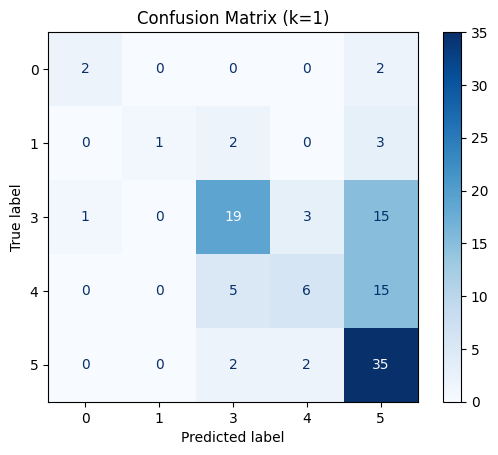

k = 3, Test set accuracy: 0.5310
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.50      0.17      0.25         6
           2       0.00      0.00      0.00         0
           3       0.43      0.87      0.58        38
           4       0.67      0.08      0.14        26
           5       0.79      0.59      0.68        39

    accuracy                           0.53       113
   macro avg       0.48      0.33      0.33       113
weighted avg       0.62      0.53      0.48       113



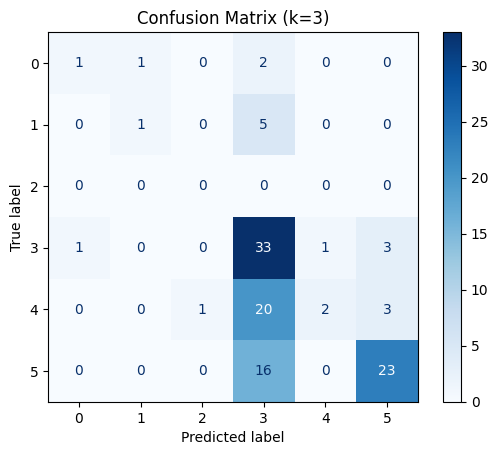

k = 5, Test set accuracy: 0.4956
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.00      0.00      0.00         6
           3       0.41      0.87      0.55        38
           4       0.00      0.00      0.00        26
           5       0.73      0.56      0.64        39

    accuracy                           0.50       113
   macro avg       0.43      0.34      0.32       113
weighted avg       0.43      0.50      0.42       113



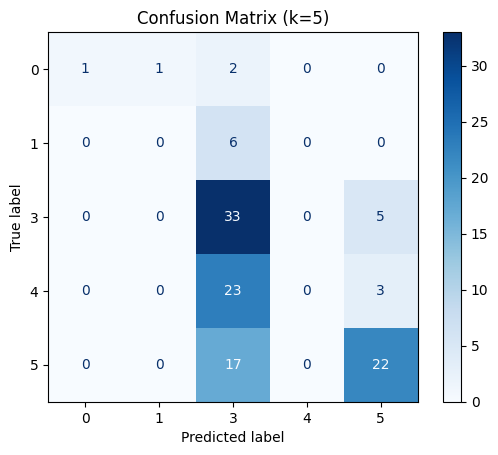

k = 7, Test set accuracy: 0.5487
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.00      0.00      0.00         6
           3       0.46      0.87      0.60        38
           4       0.00      0.00      0.00        26
           5       0.72      0.72      0.72        39

    accuracy                           0.55       113
   macro avg       0.44      0.37      0.34       113
weighted avg       0.44      0.55      0.46       113



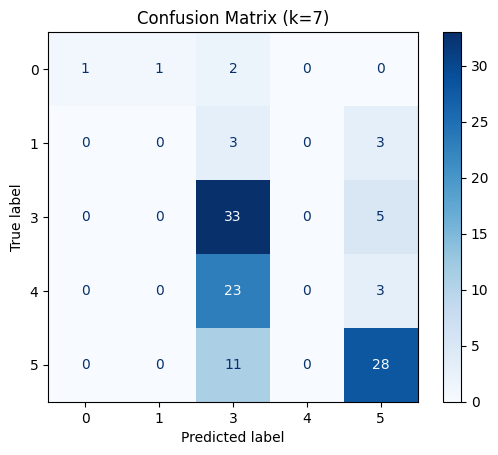

k = 9, Test set accuracy: 0.5221
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.00      0.00      0.00         6
           3       0.44      0.74      0.55        38
           4       0.00      0.00      0.00        26
           5       0.62      0.77      0.69        39

    accuracy                           0.52       113
   macro avg       0.41      0.35      0.33       113
weighted avg       0.40      0.52      0.44       113



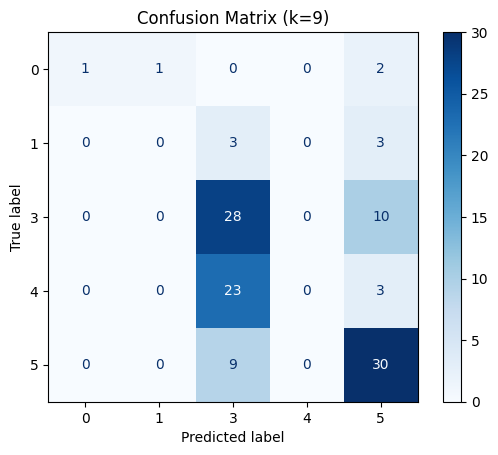

k = 11, Test set accuracy: 0.5398
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         6
           3       0.47      0.74      0.58        38
           4       0.50      0.04      0.07        26
           5       0.63      0.82      0.71        39

    accuracy                           0.54       113
   macro avg       0.32      0.32      0.27       113
weighted avg       0.49      0.54      0.46       113



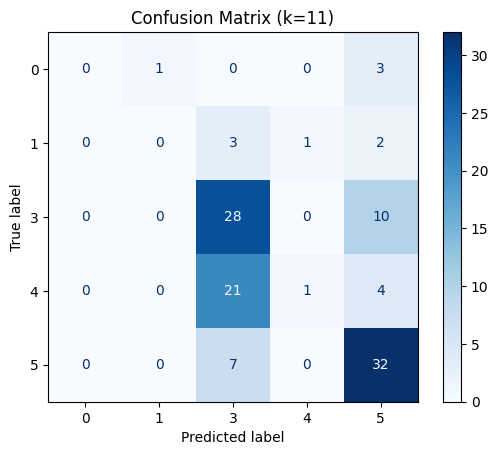

k = 13, Test set accuracy: 0.5664
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         6
           3       0.47      0.74      0.58        38
           4       1.00      0.08      0.14        26
           5       0.65      0.87      0.75        39

    accuracy                           0.57       113
   macro avg       0.43      0.34      0.29       113
weighted avg       0.62      0.57      0.48       113



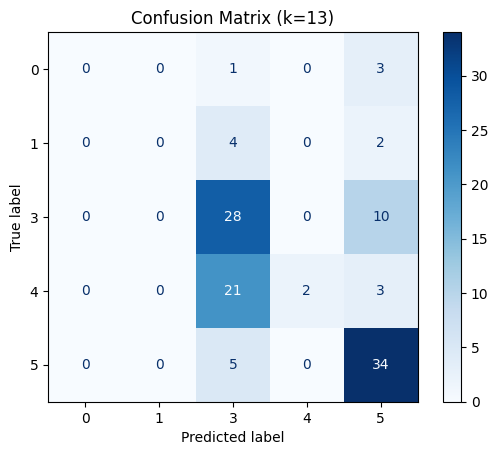

k = 15, Test set accuracy: 0.5398
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         6
           3       0.47      0.71      0.57        38
           4       1.00      0.08      0.14        26
           5       0.59      0.82      0.69        39

    accuracy                           0.54       113
   macro avg       0.41      0.32      0.28       113
weighted avg       0.59      0.54      0.46       113



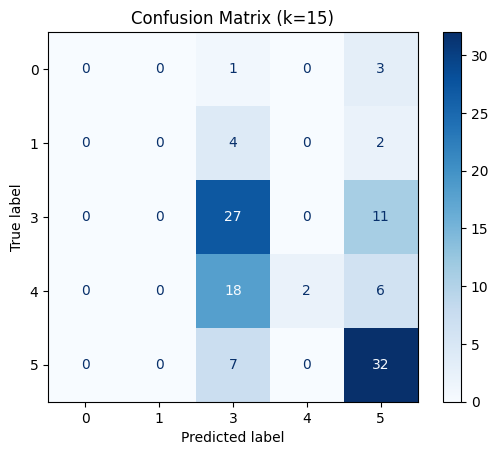

In [7]:
# Store accuracy for each k
accuracies = []

for k in k_values:
    # Initialize and train the k-NN model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_vec, y_train)

    # Predict on the test set
    y_pred = knn_model.predict(X_test_vec)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print(f"k = {k}, Test set accuracy: {accuracy:.4f}")
    
    # Get unique labels in y_test and y_pred
    unique_labels = np.unique(np.concatenate((y_test, y_pred)))
    target_names = [str(label) for label in le_ut.inverse_transform(unique_labels)]
    
    # Print classification report for each k
    print(classification_report(y_test, y_pred, labels=unique_labels, target_names=target_names, zero_division=0))
    
    # Plot the confusion matrix for each k
    ConfusionMatrixDisplay.from_estimator(knn_model, X_test_vec, y_test, display_labels=target_names, cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (k={k})")
    plt.show()

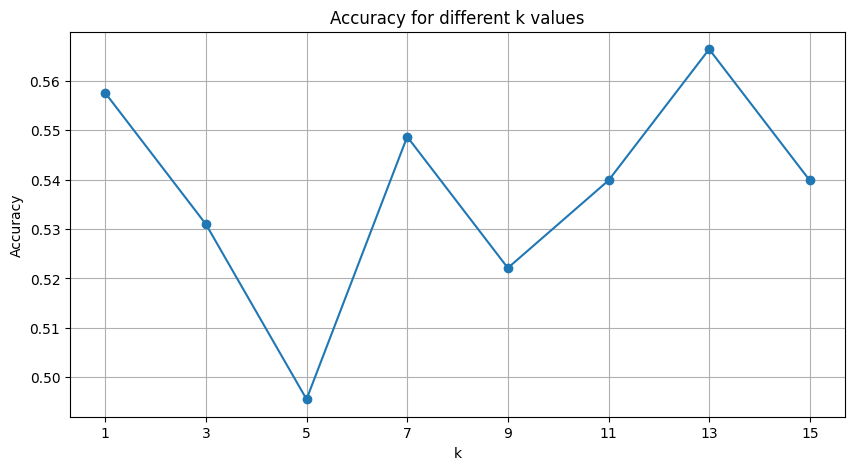

In [8]:
# Plot accuracy for different k values
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy for different k values')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()